In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('house_train_raw.csv')

test_data = pd.read_csv('houses_test_raw.csv')

In [2]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<h1>Descripcion de las Variables</h1>

In [5]:
train_data.info(81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:

train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [8]:
# A loop to show the groups can be classified for all categorical variables.
categorical_vari = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape','LandContour',\
                    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', \
                    'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', \
                    'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', \
                    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', \
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',\
                    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', \
                    'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr','KitchenAbvGr',\
                    'KitchenQual', 'TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu',\
                    'GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars','GarageQual',\
                    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence','MiscFeature','MiscVal',\
                    'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

for x in categorical_vari:
    print("{}: \n".format(x), "{} \n".format(train_data[x].value_counts()))

MSSubClass: 
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

MSZoning: 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Street: 
 Pave    1454
Grvl       6
Name: Street, dtype: int64 

Alley: 
 Grvl    50
Pave    41
Name: Alley, dtype: int64 

LotShape: 
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

LandContour: 
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

Utilities: 
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

LotConfig: 
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

LandSlope: 
 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

Neighborhood: 
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100


In [9]:
# A function to draw the hist plot for all numerical variables.

def hist_plot(variable):
    
    plt.figure(figsize = (9,3))
    plt.hist(train_data[variable], bins = 50, color = "#8e82fe")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    
    plt.show()

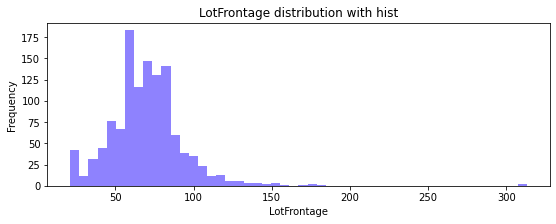

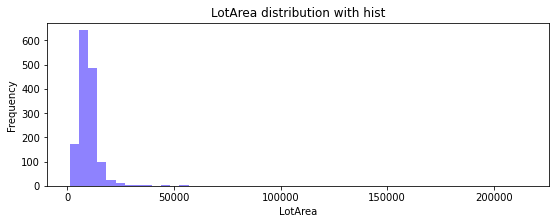

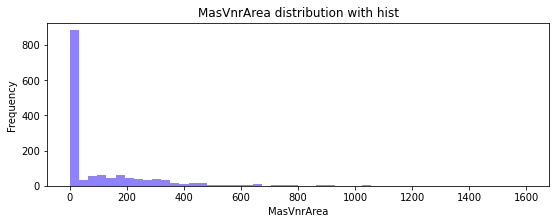

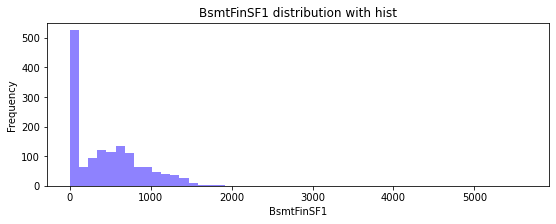

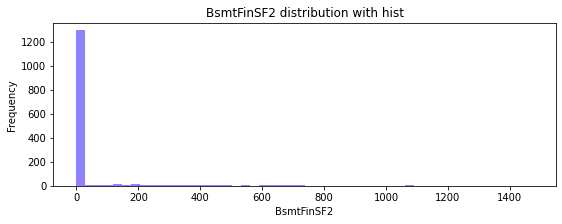

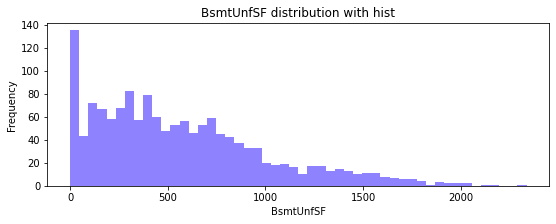

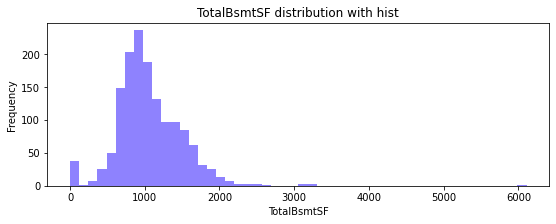

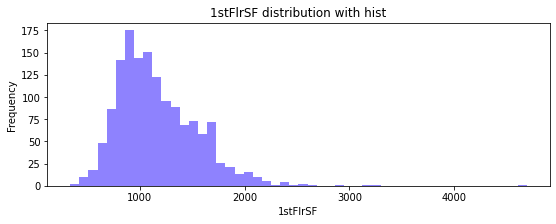

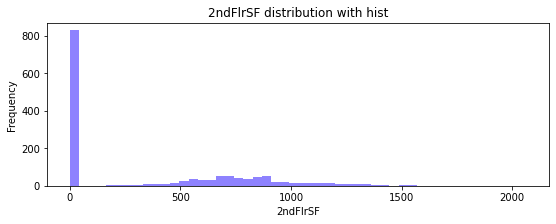

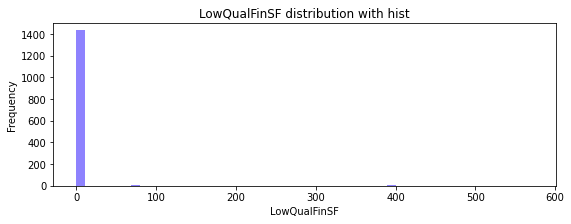

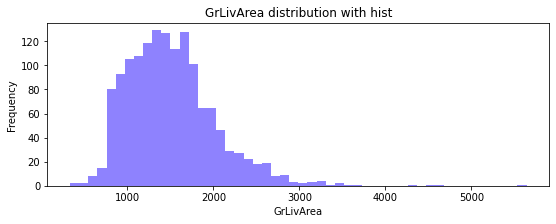

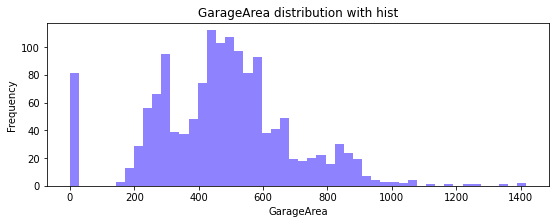

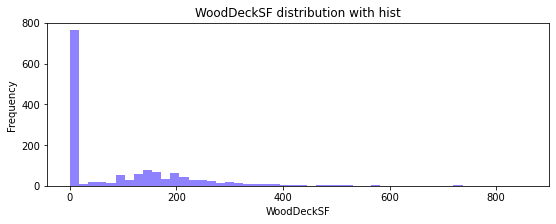

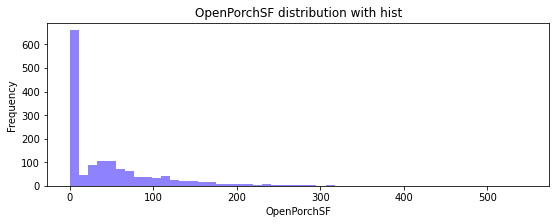

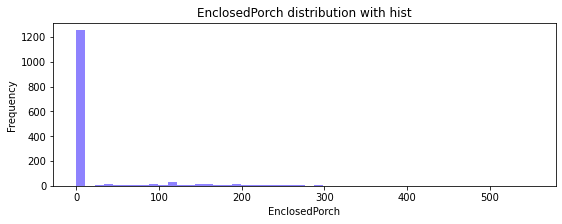

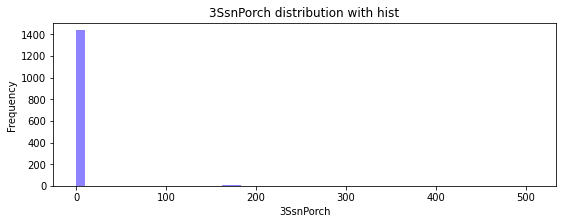

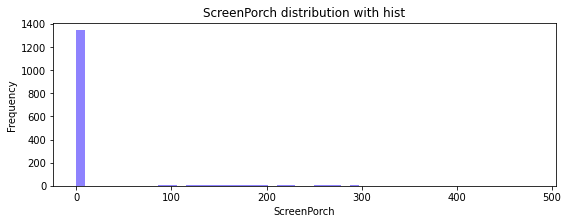

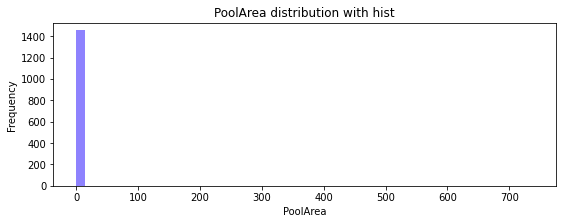

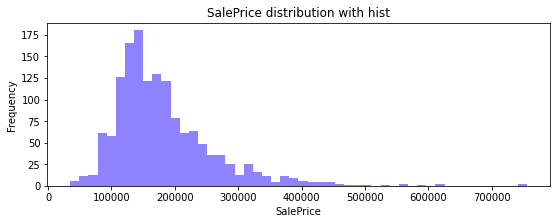

In [10]:
numerical_vari = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', \
                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', \
                  'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',\
                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice']

for y in numerical_vari:
    hist_plot(y)

Valores Faltantes

In [11]:
# Combine train data with test data, show in dataframe

train_test_combi = pd.concat([train_data, test_data], ignore_index=True)
train_test_combi

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [12]:
train_test_combi.columns[train_test_combi.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [13]:
# Show the number of "null" in each variable.

null_num = train_test_combi.isnull().sum()
null_num[null_num > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [14]:
# Find the missing rate of variable which is larger than 0.1.

null_rate = train_test_combi.isnull().sum() / train_test_combi.shape[0]
null_rate[null_rate > 0.1]

LotFrontage    0.166495
Alley          0.932169
FireplaceQu    0.486468
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
SalePrice      0.499829
dtype: float64

In [15]:
# Drop features have high missing rate.

train_test_combi1 = train_test_combi.drop(['LotFrontage', 'Alley', 'FireplaceQu','PoolQC',\
                                          'Fence', 'MiscFeature'], axis = 1)
train_test_combi1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [16]:
# Try to fill the missing value of all the features.
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy = 'most_frequent', fill_value = None)

train_test_combi1_X = train_test_combi1.drop(['SalePrice'], axis = 1)
imputed_train_test_combi1_X = pd.DataFrame(my_imputer.fit_transform(train_test_combi1_X))

# Imputation removed column names, put them back.
imputed_train_test_combi1_X.columns = train_test_combi1_X.columns

imputed_train_test_combi1_X

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [17]:
imputed_train_test_combi1_X.columns[imputed_train_test_combi1_X.isnull().any()]

Index([], dtype='object')

In [18]:
imputed_train_X = imputed_train_test_combi1_X[0:1460]
imputed_test_X = imputed_train_test_combi1_X[1460:2919]
imputed_train_X

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [19]:
train_data_fill = imputed_train_X
train_data_fill['SalePrice'] = train_data['SalePrice']
train_data_fill

C:\Users\Dracio\AppData\Local\Temp\ipykernel_4356\1255548767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_fill['SalePrice'] = train_data['SalePrice']


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [20]:
test_data_fill = imputed_test_X
test_data_fill

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1461,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
1462,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
1463,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
1464,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


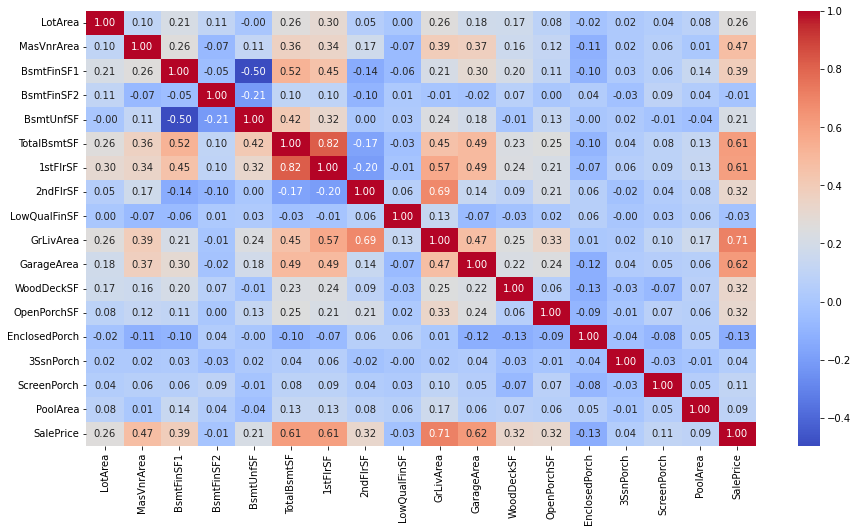

In [21]:
list1 = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',\
         '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',\
          'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',\
         'SalePrice']

plt.figure(figsize=(15, 8))
sns.heatmap(train_data_fill[list1].astype(int).corr(), cmap = "coolwarm", annot = True, \
            fmt = ".2f")
plt.show()

In [22]:
# Drop variables with low correlation from both datasets.

train_data_fill1 = train_data_fill.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', \
                                         '3SsnPorch', 'ScreenPorch', 'PoolArea'], axis = 1)
test_data_fill1 = test_data_fill.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', \
                                         '3SsnPorch', 'ScreenPorch', 'PoolArea'], axis = 1)
train_data_fill1
#test_data_fill1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,40,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,349,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,60,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,366,0,0,4,2010,WD,Normal,142125


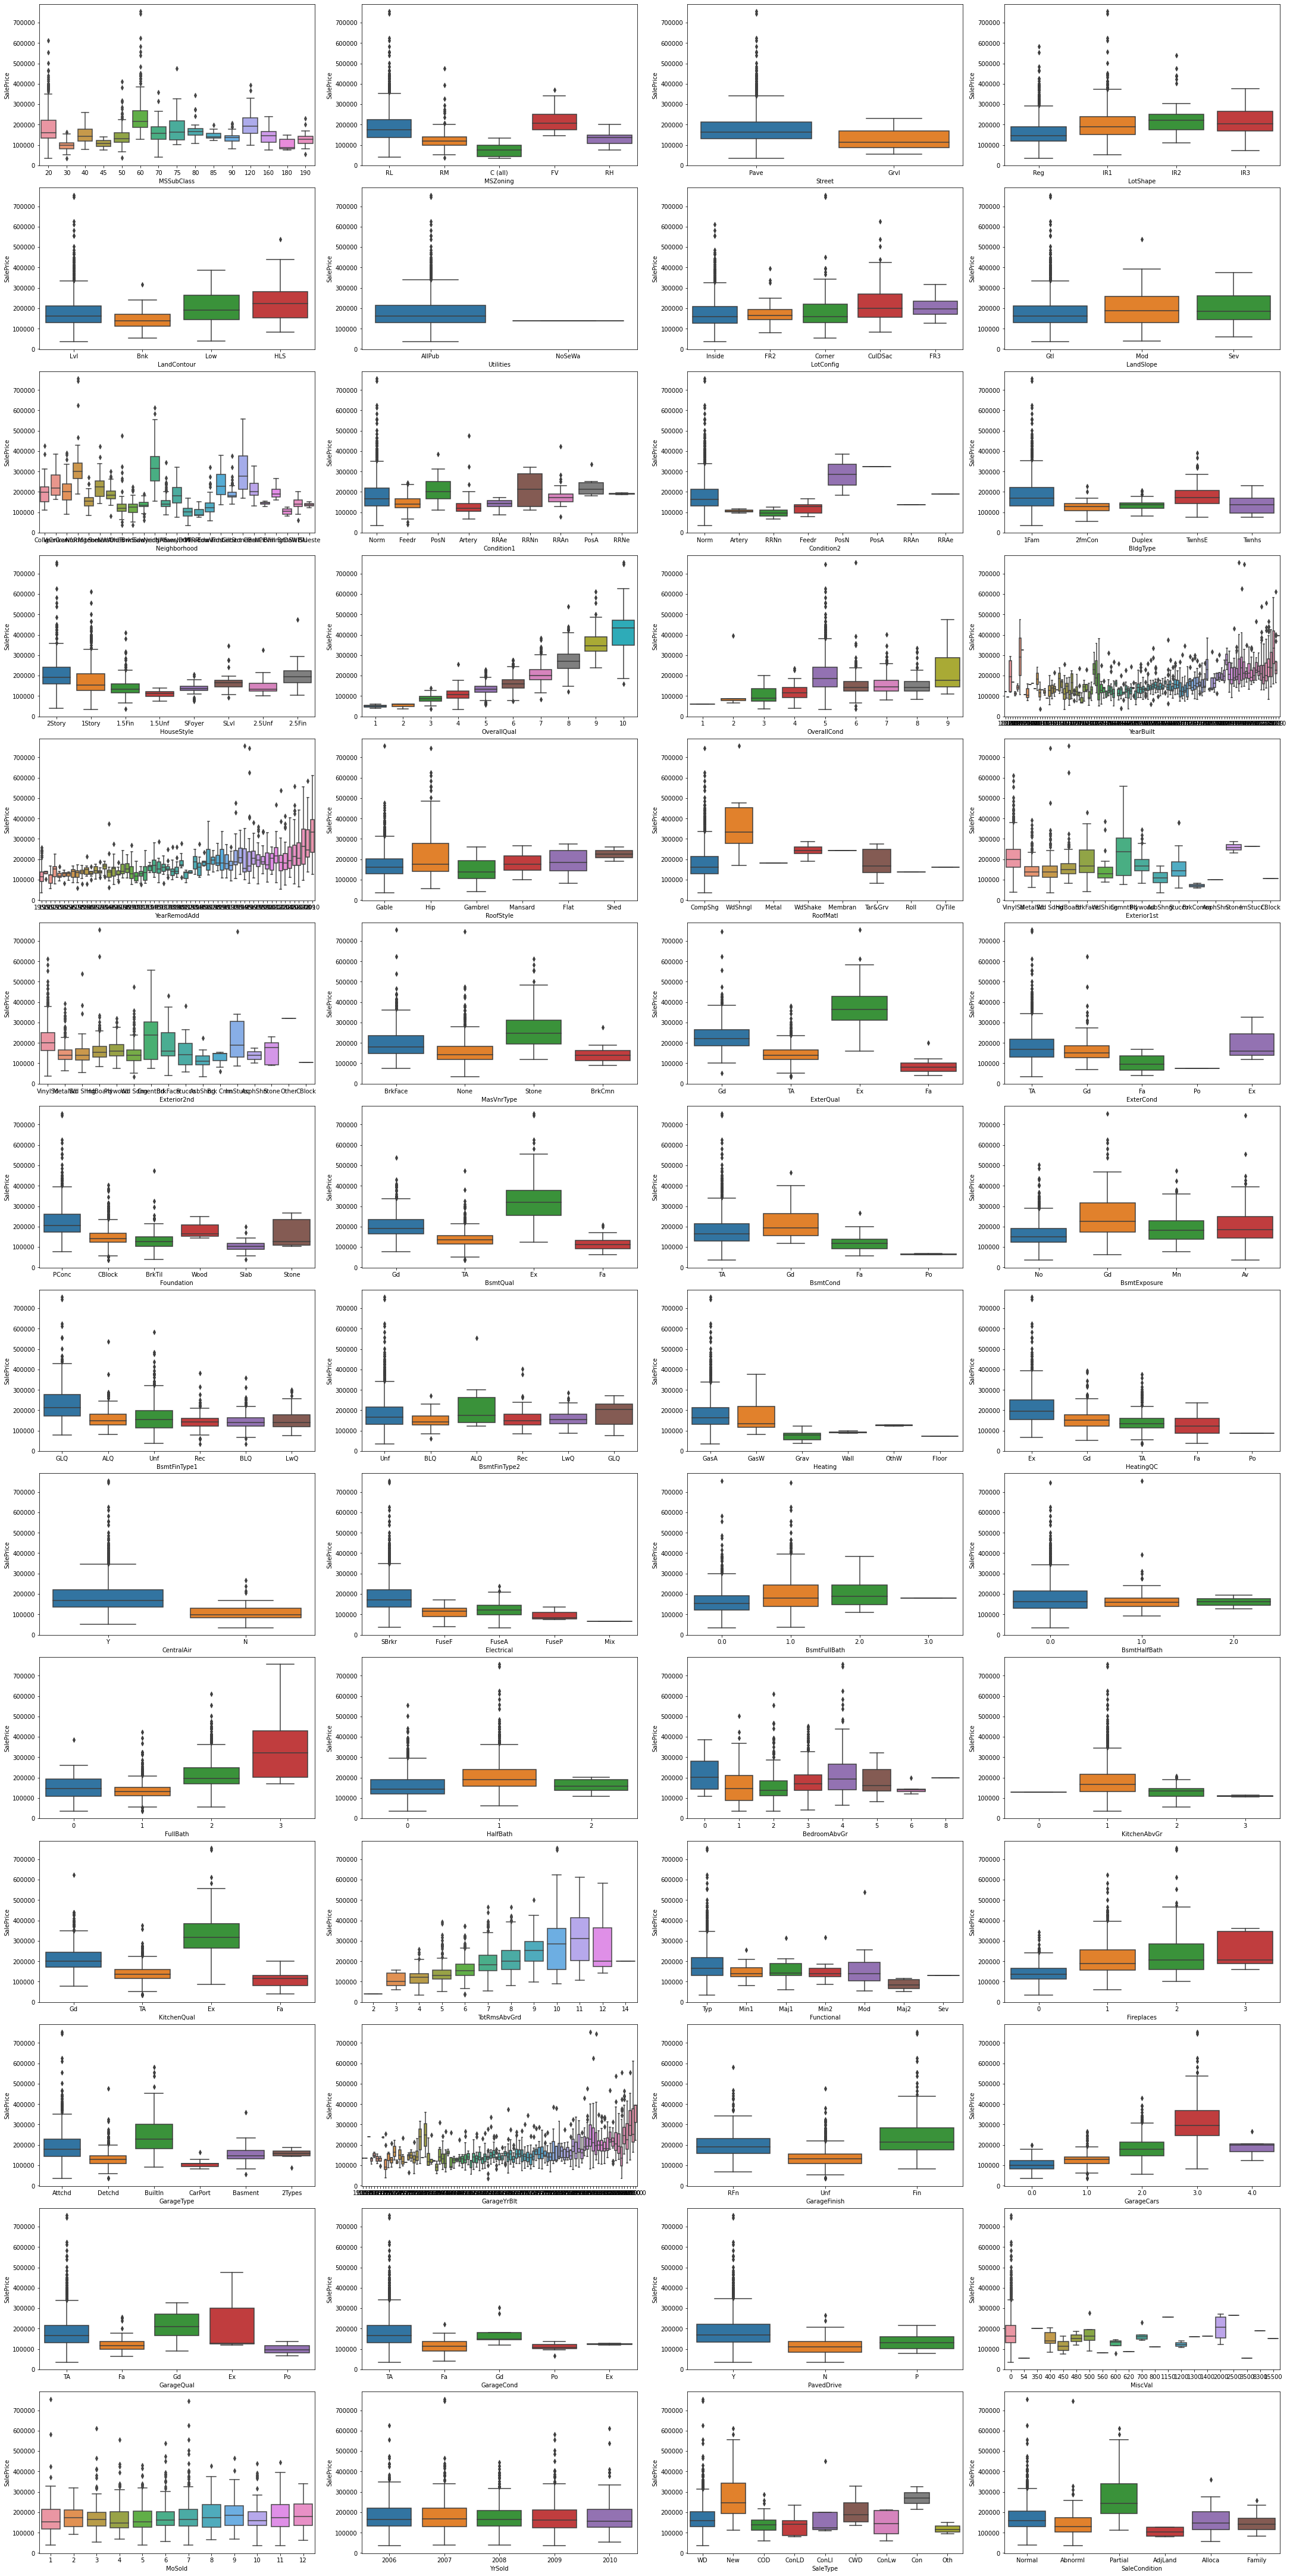

In [23]:
list2 = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', \
         'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1','Condition2','BldgType', \
         'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', \
         'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',\
         'ExterCond','Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', \
         'BsmtFinType2', 'Heating','HeatingQC', 'CentralAir', 'Electrical','BsmtFullBath',\
         'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', \
         'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', \
         'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', \
         'PavedDrive', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', \
         'SalePrice']

import math

n_cols = 4
n_rows = math.ceil((len(train_data_fill1[list2].columns) - 1) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize = (30,60), constrained_layout = True)
for col, ax in zip(train_data_fill1[list2].columns, axes.ravel()):
    sns.boxplot(ax = ax, x = col, y = 'SalePrice', data = train_data_fill1[list2])

plt.show()

In [24]:
train_data_fill2 = train_data_fill1.drop(['Utilities', 'LotConfig', 'LandSlope', \
                                        'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', \
                                        'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', \
                                        'Functional', 'GarageCond', 'PavedDrive','MoSold',\
                                        'YrSold', 'LotShape', 'LandContour', 'BldgType', \
                                        'HouseStyle','RoofStyle','ExterCond','Foundation',\
                                        'BsmtCond', 'BsmtExposure','Heating','Electrical',\
                                        'HalfBath', 'Fireplaces'], axis = 1)
test_data_fill2 = test_data_fill1.drop(['Utilities', 'LotConfig', 'LandSlope', \
                                        'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', \
                                        'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', \
                                        'Functional', 'GarageCond','PavedDrive','MoSold',\
                                        'YrSold', 'LotShape', 'LandContour', 'BldgType', \
                                        'HouseStyle','RoofStyle','ExterCond','Foundation',\
                                        'BsmtCond', 'BsmtExposure','Heating','Electrical',\
                                        'HalfBath', 'Fireplaces'], axis = 1)
train_data_fill2
#test_data_fill2

,Id,MSSubClass,MSZoning,LotArea,Street,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,...,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,MiscVal,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,CollgCr,Norm,Norm,7,5,...,RFn,2.0,548.0,TA,0,61,0,WD,Normal,208500
1,2,20,RL,9600,Pave,Veenker,Feedr,Norm,6,8,...,RFn,2.0,460.0,TA,298,0,0,WD,Normal,181500
2,3,60,RL,11250,Pave,CollgCr,Norm,Norm,7,5,...,RFn,2.0,608.0,TA,0,42,0,WD,Normal,223500
3,4,70,RL,9550,Pave,Crawfor,Norm,Norm,7,5,...,Unf,3.0,642.0,TA,0,35,0,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NoRidge,Norm,Norm,8,5,...,RFn,3.0,836.0,TA,192,84,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Gilbert,Norm,Norm,6,5,...,RFn,2.0,460.0,TA,0,40,0,WD,Normal,175000
1456,1457,20,RL,13175,Pave,NWAmes,Norm,Norm,6,6,...,Unf,2.0,500.0,TA,349,0,0,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Crawfor,Norm,Norm,7,9,...,RFn,1.0,252.0,TA,0,60,2500,WD,Normal,266500
1458,1459,20,RL,9717,Pave,NAmes,Norm,Norm,5,6,...,Unf,1.0,240.0,TA,366,0,0,WD,Normal,142125


In [25]:
num_list = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',\
            '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Id']

year_list = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

Cate_list = ['MSSubClass', 'MSZoning', 'Street', 'Neighborhood','Condition1','Condition2',\
             'OverallQual', 'OverallCond', 'RoofMatl', 'Exterior1st', 'Exterior2nd', \
             'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir','FullBath','BedroomAbvGr',\
             'KitchenQual', 'TotRmsAbvGrd', 'GarageType', 'GarageFinish', 'GarageCars', \
             'GarageQual', 'MiscVal', 'SaleType', 'SaleCondition']

In [26]:
train_data_fill3 = train_data_fill2
train_data_fill3[num_list] = train_data_fill2[num_list].astype(int)
train_data_fill3[year_list] = train_data_fill2[year_list].astype(int)

In [27]:
test_data_fill3 = test_data_fill2
test_data_fill3[num_list] = test_data_fill2[num_list].astype(int)
test_data_fill3[year_list] = test_data_fill2[year_list].astype(int)

In [28]:
for x in Cate_list:
    print("{}: \n".format(x), "{} \n".format(train_data_fill2[x].value_counts()))

MSSubClass: 
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

MSZoning: 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Street: 
 Pave    1454
Grvl       6
Name: Street, dtype: int64 

Neighborhood: 
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

Condition1: 
 Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: 

In [29]:
# cardinality in these categorical variables are defined by numerical number.
Cate_list1 = ['MSSubClass', 'OverallQual', 'OverallCond', 'FullBath', 'BedroomAbvGr', \
              'TotRmsAbvGrd', 'GarageCars', 'MiscVal']

# cardinality in these categorical variables are defined by letters.
Cate_list2 = ['MSZoning', 'Street', 'Neighborhood', 'Condition1', 'Condition2','RoofMatl',\
              'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'BsmtQual', \
              'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', \
              'SaleType', 'SaleCondition']

In [30]:
train_data_fill3[Cate_list1] = train_data_fill2[Cate_list1].astype(int)

In [31]:
test_data_fill3[Cate_list1] = test_data_fill2[Cate_list1].astype(int)

In [32]:
# The number of groups in each categorical variables
num_group = train_data_fill2[Cate_list2].nunique().sort_values(ascending=False)
print(num_group)

# which categorical variable has more different groups, more than 10 groups
high_cardinality_cols = list(num_group[num_group >= 10].index)
print('high_cardinality_cols =', high_cardinality_cols)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
Condition2        8
RoofMatl          8
SaleCondition     6
GarageType        6
GarageQual        5
MSZoning          5
KitchenQual       4
BsmtQual          4
MasVnrType        4
ExterQual         4
GarageFinish      3
CentralAir        2
Street            2
dtype: int64
high_cardinality_cols = ['Neighborhood', 'Exterior2nd', 'Exterior1st']


In [33]:
train_test_fill_combi = pd.concat([train_data_fill2[Cate_list2], \
                                   test_data_fill2[Cate_list2]], ignore_index = True)
train_test_fill_combi

,MSZoning,Street,Neighborhood,Condition1,Condition2,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,BsmtQual,CentralAir,KitchenQual,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition
0,RL,Pave,CollgCr,Norm,Norm,CompShg,VinylSd,VinylSd,BrkFace,Gd,Gd,Y,Gd,Attchd,RFn,TA,WD,Normal
1,RL,Pave,Veenker,Feedr,Norm,CompShg,MetalSd,MetalSd,None,TA,Gd,Y,TA,Attchd,RFn,TA,WD,Normal
2,RL,Pave,CollgCr,Norm,Norm,CompShg,VinylSd,VinylSd,BrkFace,Gd,Gd,Y,Gd,Attchd,RFn,TA,WD,Normal
3,RL,Pave,Crawfor,Norm,Norm,CompShg,Wd Sdng,Wd Shng,None,TA,TA,Y,Gd,Detchd,Unf,TA,WD,Abnorml
4,RL,Pave,NoRidge,Norm,Norm,CompShg,VinylSd,VinylSd,BrkFace,Gd,Gd,Y,Gd,Attchd,RFn,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,MeadowV,Norm,Norm,CompShg,CemntBd,CmentBd,None,TA,TA,Y,TA,Attchd,Unf,TA,WD,Normal
2915,RM,Pave,MeadowV,Norm,Norm,CompShg,CemntBd,CmentBd,None,TA,TA,Y,TA,CarPort,Unf,TA,WD,Abnorml
2916,RL,Pave,Mitchel,Norm,Norm,CompShg,VinylSd,VinylSd,None,TA,TA,Y,TA,Detchd,Unf,TA,WD,Abnorml
2917,RL,Pave,Mitchel,Norm,Norm,CompShg,HdBoard,Wd Shng,None,TA,Gd,Y,TA,Attchd,Unf,TA,WD,Normal


In [34]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

OH_train_test_fill_combi = pd.DataFrame(OH_encoder.fit_transform(train_test_fill_combi))
OH_train_test_fill_combi.index = train_test_fill_combi.index
OH_train_test_fill_combi

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
OH_train_data_fill3 = OH_train_test_fill_combi[0:1460]
OH_test_data_fill3 = OH_train_test_fill_combi[1460:2919]

In [36]:
# Remove categorical columns (will replace with one-hot encoding)
Drop_train_data_fill3 = train_data_fill3.drop(Cate_list2, axis=1)

# Add one-hot encoded columns to other features
Pre_train_data = pd.concat([Drop_train_data_fill3,OH_train_data_fill3.astype(int)], axis=1)
Pre_train_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,125,126,127,128,129,130,131,132,133,134
0,1,60,8450,7,5,2003,2003,196,706,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0,978,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162,486,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0,216,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350,655,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,119,790,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,0,275,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,0,49,0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
# Remove categorical columns (will replace with one-hot encoding)
Drop_test_data_fill3 = test_data_fill3.drop(Cate_list2, axis=1)

# Add one-hot encoded columns to other features
Pre_test_data = pd.concat([Drop_test_data_fill3, OH_test_data_fill3.astype(int)], axis=1)
Pre_test_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,125,126,127,128,129,130,131,132,133,134
1460,1461,20,11622,5,6,1961,1961,0,468,270,...,0,0,0,1,0,0,0,0,1,0
1461,1462,20,14267,6,6,1958,1958,108,923,406,...,0,0,0,1,0,0,0,0,1,0
1462,1463,60,13830,5,5,1997,1998,0,791,137,...,0,0,0,1,0,0,0,0,1,0
1463,1464,60,9978,6,6,1998,1998,20,602,324,...,0,0,0,1,0,0,0,0,1,0
1464,1465,120,5005,8,5,1992,1992,0,263,1017,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,1936,4,7,1970,1970,0,0,546,...,0,0,0,1,0,0,0,0,1,0
2915,2916,160,1894,4,5,1970,1970,0,252,294,...,0,0,0,1,1,0,0,0,0,0
2916,2917,20,20000,5,7,1960,1996,0,1224,0,...,0,0,0,1,1,0,0,0,0,0
2917,2918,85,10441,5,5,1992,1992,0,337,575,...,0,0,0,1,0,0,0,0,1,0


In [38]:
Pre_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 159 entries, Id to 134
dtypes: int32(158), int64(1)
memory usage: 912.6 KB


In [39]:
from sklearn.model_selection import train_test_split

X_Variable = Pre_train_data.drop(['Id', 'SalePrice'], axis = 1)
y_Target = Pre_train_data['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X_Variable, y_Target, \
                                                      test_size = 0.3, random_state = 0)

In [40]:
from sklearn.metrics import mean_squared_log_error

In [58]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_valid)
MAE_RF = np.sqrt(mean_squared_log_error(y_pred_RF, y_valid))
print('The MAE of Random Forest model is:', MAE_RF)

c:\Users\Dracio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Dracio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The MAE of Random Forest model is: 0.20974787354988836


In [59]:
# XGBoost
from xgboost import XGBRegressor

model_XGB = XGBRegressor(random_state = 0)
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_valid)
MAE_XGB = np.sqrt(mean_squared_log_error(y_pred_XGB, y_valid))
print('The MAE of XGBoost model is:', MAE_XGB)

The MAE of XGBoost model is: 0.14073231713604437


In [60]:
model_D = DecisionTreeRegressor(random_state = 0)
model_D.fit(X_train, y_train)
y_pred_D = model_XGB.predict(X_valid)
MAE_D = np.sqrt(mean_squared_log_error(y_pred_XGB, y_valid))
print('The MAE of XGBoost model is:', MAE_D)

The MAE of XGBoost model is: 0.14073231713604437


c:\Users\Dracio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [61]:
model_G= GradientBoostingRegressor(random_state = 0)
model_G.fit(X_train, y_train)
y_pred_G = model_XGB.predict(X_valid)
MAE_G = np.sqrt(mean_squared_log_error(y_pred_XGB, y_valid))
print('The MAE of XGBoost model is:', MAE_G)

c:\Users\Dracio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The MAE of XGBoost model is: 0.14073231713604437


In [63]:
model_L = LinearRegression()
model_L.fit(X_train, y_train)
y_pred_L = model_L.predict(X_valid)
MAE_L = np.sqrt(mean_squared_log_error(y_pred_XGB, y_valid))
print('The MAE of XGBoost model is:', MAE_L)

The MAE of XGBoost model is: 0.14073231713604437


c:\Users\Dracio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Dracio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [51]:
RF = RandomForestRegressor().fit(X_train, y_train)
DT = DecisionTreeRegressor().fit(X_train, y_train)
GBR = GradientBoostingRegressor().fit(X_train, y_train)
LR = LinearRegression().fit(X_train, y_train)
XGB = XGBRegressor().fit(X_train, y_train)

c:\Users\Dracio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Dracio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Dracio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Dracio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. 

In [54]:
# the evaluation metrics
models = [LR, DT, RF, GBR, XGB]
RMSE = [np.sqrt(mean_squared_log_error(y_valid),mod.predict(X_valid))**0.5 for mod in models]

TypeError: mean_squared_log_error() missing 1 required positional argument: 'y_pred'

In [48]:
# XGBoost
from xgboost import XGBRegressor

model_XGB = XGBRegressor(random_state = 0, n_estimators=1000, learning_rate=0.01)
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_valid)
MAE_XGB = np.sqrt(mean_squared_log_error(y_pred_XGB, y_valid))
print('The MAE of XGBoost model is:', MAE_XGB)

The MAE of XGBoost model is: 0.12261254146556017


In [49]:
# XGBoost
from xgboost import XGBRegressor

model_XGB = XGBRegressor(random_state = 0, n_estimators=1000, learning_rate=0.01)
model_XGB.fit(X_Variable, y_Target)

y_predictions_XGB = model_XGB.predict(Pre_test_data.drop(['Id'], axis = 1)).astype(int)
print(y_predictions_XGB)

[126194 161595 183727 ... 156065 118263 209933]


In [45]:
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_predictions_XGB})

#output.to_csv('submission.csv', index = False)
output


,Id,SalePrice
0,1461,126194
1,1462,161595
2,1463,183727
3,1464,189098
4,1465,195003
...,...,...
1454,2915,81398
1455,2916,80783
1456,2917,156065
1457,2918,118263
